In [1]:
from shared import *
import utils.forge as forge
from utils.wearable_types import get_wearable_types_df, get_wearables_circulating_supply_df
wearable_types_df = get_wearable_types_df()
forge_items_df = forge.get_forge_items_df()
circulating_supply_df = get_wearables_circulating_supply_df(wearable_types_df, forge_items_df)

forge_activity_df = forge.get_forge_activity_df().merge(wearable_types_df[['name', 'rarity', 'slotNames', 'forge_alloy', 'smelt_alloy']], left_on='item.id', right_index=True)
forge_activity_df['alloy_locked'] = (forge_activity_df['forge_alloy'] - forge_activity_df['smelt_alloy']) * (forge_activity_df['activity'] == 'itemSmelteds')
forge_activity_df['forge_count'] = forge_activity_df['activity'].apply(lambda x: 1 if x == 'itemForgeds' else 0)
forge_activity_df['smelt_count'] = forge_activity_df['activity'].apply(lambda x: 1 if x == 'itemSmelteds' else 0)
forge_activity_df['change_in_supply'] = forge_activity_df['forge_count'] - forge_activity_df['smelt_count']
def get_forge_activity_totals_by_column(forge_activity_df, column_name):
    return forge_activity_df.groupby([column_name]).agg({'alloy_locked': 'sum', 'forge_count': 'sum', 'smelt_count': 'sum', 'change_in_supply': 'sum'})
forge_activity_by_week = get_forge_activity_totals_by_column(forge_activity_df, 'startOfWeek').reset_index().rename(columns={'alloy_locked': 'Alloy Locked'})
forge_activity_by_month = get_forge_activity_totals_by_column(forge_activity_df, 'yearMonth').reset_index().rename(columns={'alloy_locked': 'Alloy Locked'})


## Alloy Locked (All-Time)
Alloy is the common component required to forge all wearables. *Alloy Locked* refers to the 10% alloy cost that is removed from circulation (via burning or sending to the Aavegotchi DAO) every time a wearable is smelted.

In [3]:
total_alloy_locked = ((circulating_supply_df['forge_alloy'] - circulating_supply_df['smelt_alloy']) * circulating_supply_df['timesSmelted']).sum()
total_alloy_burned = int(total_alloy_locked / 2)
total_alloy_dao = total_alloy_locked - total_alloy_burned
total_forge_activity = pd.DataFrame([[total_alloy_locked, total_alloy_burned, total_alloy_dao]], columns=['Alloy Locked', 'Alloy Burned', 'Alloy Sent to DAO'])
show_itable(total_forge_activity)

### Alloy Locked by Week

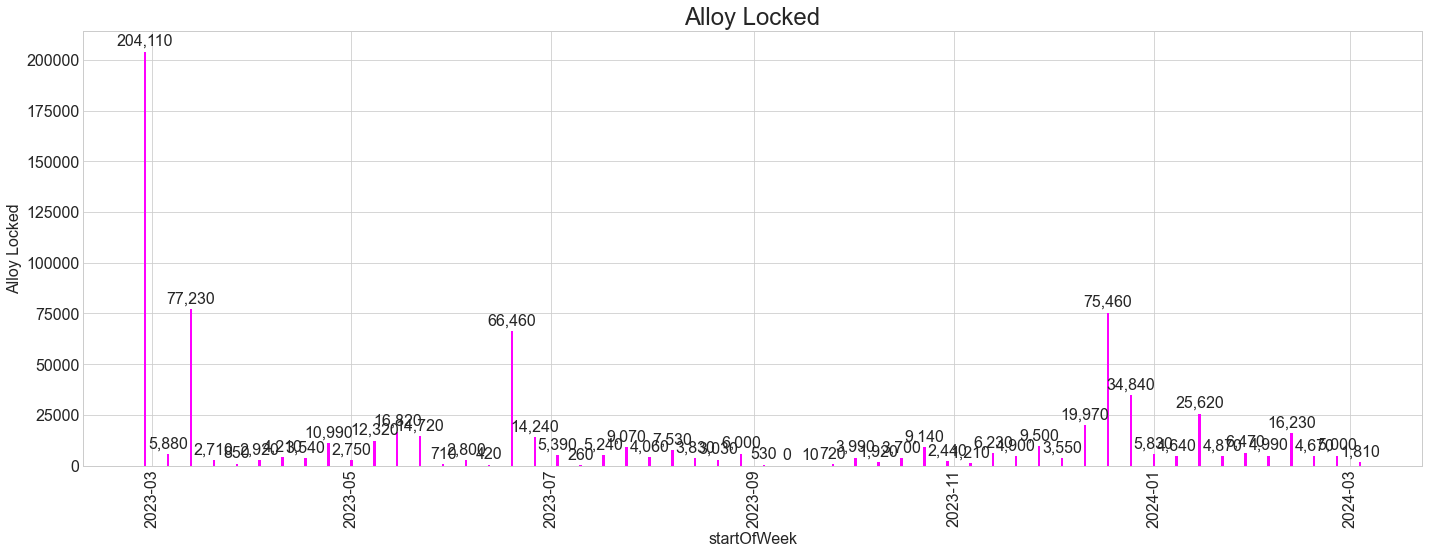

In [4]:
fig, ax = get_bar_charts(forge_activity_by_week, 'startOfWeek', ['Alloy Locked'], [GHST_COLOR])
ax.tick_params(axis='x', labelrotation=90)
plt.show()

### Alloy Locked by Month

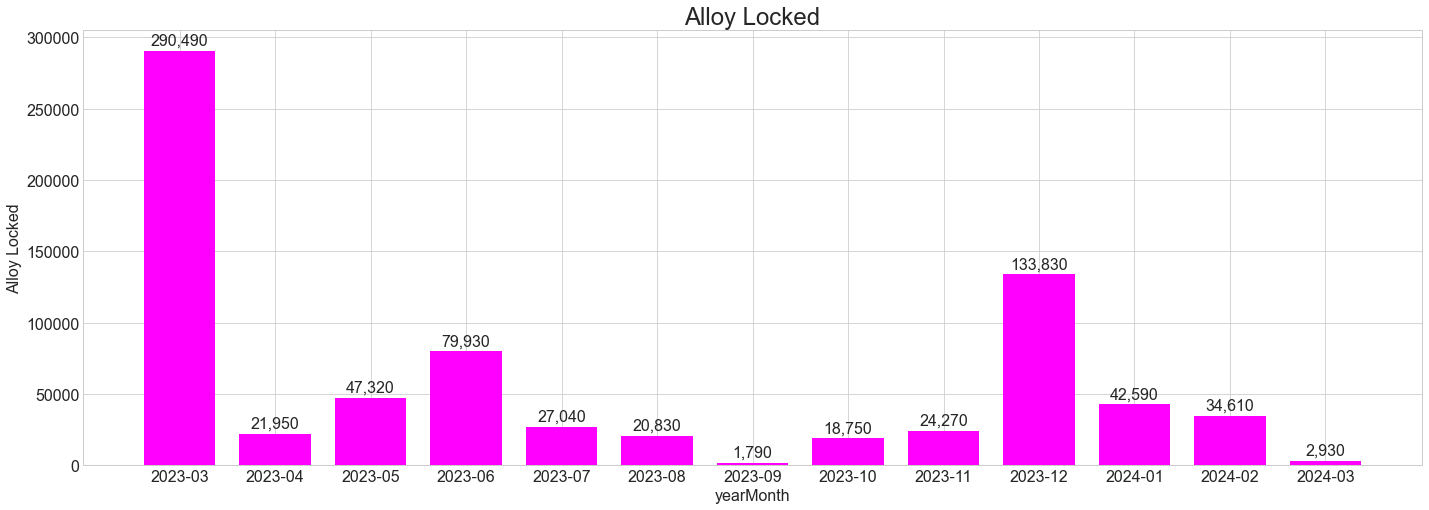

In [5]:
fig, ax = get_bar_charts(forge_activity_by_month, 'yearMonth', ['Alloy Locked'], [GHST_COLOR])
plt.show()